# Guia 3

## Ejercicio 6

En el archivo `escala.wav` se encuentran almacenados ocho tonos puros (notas musicales) sin separación, cada uno de 0.5 segundos de duración. Implemente un algoritmo para detectar el momento donde se encuentra la nota LA. Se adjunta la tabla de frecuencias de las notas musicales.

| Nota | Frecuencia [Hz] |
| ---- | --------------- |
| DO   | 261.63 |
| RE   | 293.66 |
| MI   | 329.63 |
| FA   | 349.23 |
| SOL  | 392.00 |
| LA   | 440.00 |
| SI   | 493.88 |
| DO   | 523.25 |

### Solución

Igual que en el ejercicio anterior, vamos a usar el producto interno

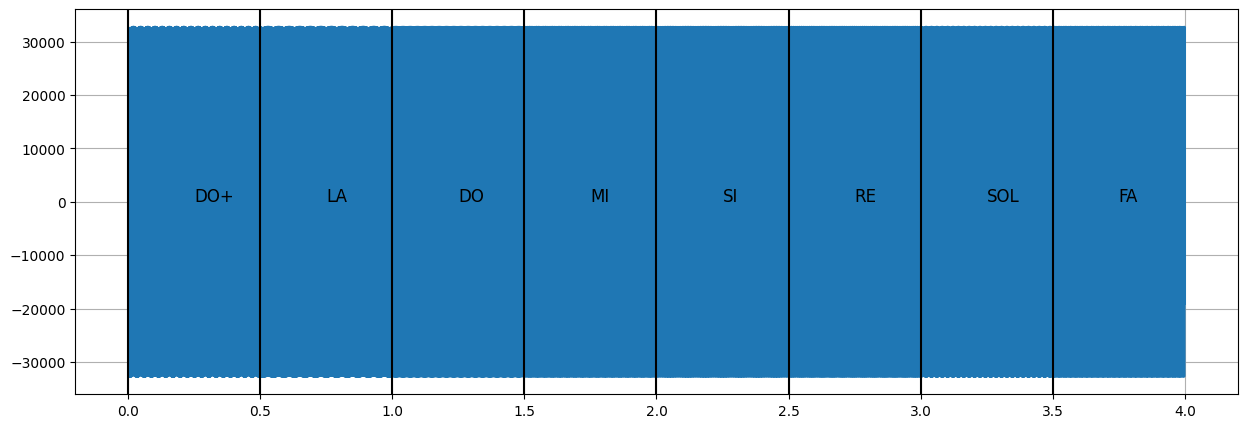

In [1]:
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

notas = [
    'DO',
    'RE',
    'MI',
    'FA',
    'SOL',
    'LA',
    'SI',
    'DO+',
]

def senoidal(t,fs):
    """Genera senoidal de frecuencia fs"""
    return np.sin(2*np.pi*t*fs)

def productoInterno(x,y):
    """Producto interno entre las seniales x e y"""
    # Verificar que tengan la misma longitud
    if(len(x) != len(y)):
        raise Exception('Las seniales no son del mismo tamanio')

    return np.sum(np.multiply(x,np.conjugate(y)))

def identificar(t,s):
    prods = [
        np.abs(productoInterno(s,senoidal(t,261.63))),
        np.abs(productoInterno(s,senoidal(t,293.66))),
        np.abs(productoInterno(s,senoidal(t,329.63))),
        np.abs(productoInterno(s,senoidal(t,349.23))),
        np.abs(productoInterno(s,senoidal(t,392.00))),
        np.abs(productoInterno(s,senoidal(t,440.00))),
        np.abs(productoInterno(s,senoidal(t,493.88))),
        np.abs(productoInterno(s,senoidal(t,523.25)))
    ]

    return notas[np.argmax(prods)]

# Leer datos
a = read('escala.wav')
audio = np.array(a[1], dtype=float)

# Parametros de la senial
Tini = 0
Tfin = 4
fm = len(audio)/4.0

t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)

# Identificar cada nota
zonas = [
    {'ini':0.0},
    {'ini':0.5},
    {'ini':1.0},
    {'ini':1.5},
    {'ini':2.0},
    {'ini':2.5},
    {'ini':3.0},
    {'ini':3.5},
]
for zona in zonas:
    subt = t[int(zona['ini']*fm):int((zona['ini']+0.5)*fm)]
    subaudio = audio[int(zona['ini']*fm):int((zona['ini']+0.5)*fm)]
    zona['nota'] = identificar(subt,subaudio)

# Graficar
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
ax.grid()

ax.plot(t,audio)

for zona in zonas:
    ax.axvline(zona['ini'], color='black')
    ax.text(zona['ini']+0.25, 1.7, zona['nota'], fontsize=12, transform=ax.transData)

plt.show()